# Image processing using numpy 

In [1]:
from matplotlib import pylab as plt
from glob import glob
import numpy as np
%matplotlib inline

## The basics

Images can be represented as multidimensional matrices of numbers. We can represent an grayscale image with N rows and M columns with a NxM matrix. We can add an additional dimension for each of the three color channels (red, green, blue) to represent a color image. The resulting matrix will have three dimensions: N rows, M columns, and 3 channels. 

The `matplotlib.pylab` module allows loading png images as three-dimensional numpy matrices. Let's load several images and see what we can do with them.

In [2]:
images = []
for i, filename in enumerate(glob('./data/photos/*.png')):
    im = plt.imread(filename)
    images.append(im)
im = images[0] # pick one of the images
print(len(images))

9


In [10]:
# shape of first image, 480 pixels, 720 pixels, 3 channels RGB
im.shape 

(480, 720, 3)

We can use the function `plt.imshow` to display the image. This function is smart enough to detect the three color channels and to translted them to the appropriate shades.

In [12]:
plt.imshow(im)

In [19]:
fig, axs = plt.subplots(nrows=1,
                      ncols = 3,
                      figsize = (15,5)
                      )

channels = ("R","G","B")
for c, ax, channel in zip(range(3), axs, channels):
    ax.imshow(
    im[:,:,c], cmap = "gray")
    ax.set_title(channel)

The next cell prints a list of supported colormaps. Feel free replacing `gray` in the above cell with one of these:

In [6]:
print(', '.join([a for a in dir(plt.cm) if not a.startswith('_')]))

Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, LUTSIZE, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, ScalarMappable, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Vega10, Vega10_r, Vega20, Vega20_r, Vega20b, Vega20b_r, Vega20c, Vega20c_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, absolute_import, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cbook, cmap_d, cmapname, cmaps_listed, colors, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, datad, division, flag, flag_r, get_cmap, gist_earth, gist_earth_r

**Challenge**

The image is a collection of three channels: red, green, blue. One way to create a black/white image from the color one is to compute the average signal in each pixel over the three channels. Use the `mean` function to obtain such b/w image and dislay it.

(480, 720)

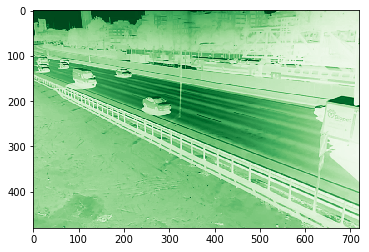

In [41]:

imbw = im.mean(axis =2)
plt.imshow(imbw, cmap = "Greens")
imbw.shape

**Challenge**

Try changing the channels places, display the new image, and see what happens.

In [32]:
#! Challenge
#imbw = ...
#plt.imshow(imbw, cmap='gray')

#shuffling layers of images

new_image = im[ :, :, [1,2,0]]

plt.imshow(new_image)

In [9]:
#! Challenge
# new_image = im[ ... , ... , ... ]
# show_image(new_image)

## Going one step further

Let's use the power of `numpy` to have some fun with images. 

In [42]:
original_shape = im.shape
original_dimensions = (original_shape[0], original_shape[1])
n_images = len(images)

In the next sections, we will experiment with several image processing ideas. Let's define several auxiliary functions that will help us as we go. You will notice that we will use **flat** representations of images. To get a flat represntation of an image, we reshape the original NxMx3 matrix into a vector of N*M*3 elements. We can always get the original image back by applying the reverse transformtion. In numpy, matrix flattening is done using the function (surprise) `flatten`, and the unfolding is done using `reshape`.

In [44]:
def show_image(im, ax=None):
    ''' Show an image.   
    
    Parameters
    ----------
    im : np.array
        An image represented as a numpy matrix
    ax : None or a matplotlib `axis` object
        If None, create a new matplotlib figure and add a single `axis` to it. 
        Otherwise, use the supplied `axis`. The image will be shown on `ax`
        
    Returns
    -------
    Matplotlib axis with the image
    '''
    if ax is None:
        h = 10
        w = h / 4 * 3
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(w, h))
    ax.imshow(im, cmap='gray')
    ax.set_axis_off()
    return ax   

def image_from_flat(flat, target_shape=original_shape):
    """ Reconstruct the image from its flat representation
    
    Parameters
    ----------
    flat : np.array
        Flat representation of the image
    target_shape : tuple of ints
        The shape of the image that we wish to reconstruct. The default value
        is `original_shape`, which exists in the outer scope. It is your responsibility
        that the dimension match.
        
    Return
    ------
    Reconstructed image as a numpy matrix
    """
    return flat.reshape(target_shape) # original_shape "lives" in the outer scope


def show_flat_image(flat, ax=None):
    """Use `image_from_flat` and `show_image` to show a flat image"""
    im = image_from_flat(flat)
    return show_image(im, ax)

Since an image is a matrix of numbers, we can use simple mathematical operations for image processing. Here, for example, we multipy the image `im` by a scalar to change its brighness

In [45]:
show_image(im*.2)

In [58]:
show_image(im*.5)

...

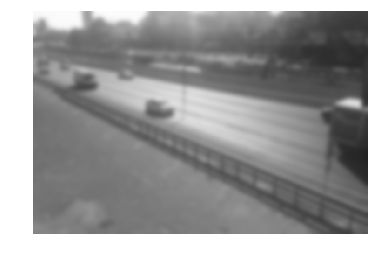

In [64]:
# takes a single pixel, takes neighborhood and replaces the value of a pixel by the average
# the boundary is not hard bound it uses a gaussian distribution, closer pixels have higher weight

from scipy import ndimage
tmp = ndimage.filters.gaussian_filter(input = im, sigma = 5)
show_image(tmp)

`ndimage` is a very powerful toolbox. You should read [its documentaion](https://docs.scipy.org/doc/scipy/reference/ndimage.html) if you want to start serious image processing. 

**Challenge** 

Use `all_image_flattened` to compute and display the average frame in its flat representation.

In [1]:
#! Challenge
# mean_image = 
# show_flat_image(mean_image)

In [65]:
all_frames = np.array([im for im in images])
all_frames.shape

(9, 480, 720, 3)

In [66]:
all_frames_flattened = np.array([im.flatten() for im in images])
all_frames_flattened.shape

(9, 1036800)

(1036800,)


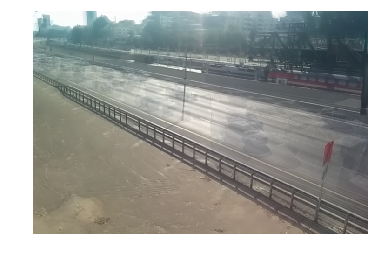

In [70]:
mean_image = all_frames_flattened.mean(axis = 0)
print mean_image.shape

show_flat_image(mean_image)


**Challenge** 

Now, compute and display the median image (use `np.percentile` to compute the median). What can you tell about the difference between the mean and the median images

In [74]:
median_image = np.percentile(all_frames_flattened, .5, axis = 0)
print mean_image.shape

show_flat_image(median_image)


(1036800,)


## Removing moving objects

The images you see here where taken on a busy road. In every frame, some parts of the road and the adjasting buildings are hindered by the passing cars and people. Since these objects are in a constand move, most parts of the roads and the buildings are seen at least in some frames. In theory, we may combine the available information to reconstruct the image of the empty streed. We already saw this effect in "median" image. Let's try another approach.

The biggest limitation of the median image is that each channel is treated separately. Erasing moving objects requires identifying the "static" pixels and taking all the channels that belong to those pixels. 

Our strategy is as follows. 
* Select a reference image. The average frame can be a nice starting point
* Compute the absolute difference between each frame and the reference. For more readable code, we will use the flat representations of the images.
* Of all the available images, select the pixels that have the smallest absolute deviation from the reference image, over all three color channels. To do that:
    * Create a four-dimensional matrix out of all the diffece vectors. The dimensions will be: the three dimensions that we already met (X, Y coordinates and the color channel) plus and additional dimension for the frames taken. 
    * In each dimension, for every pixel, compute the average absolute difference over the three color channel. The result will be a three-dimensional matrix in which the dimensions are the X, Y pixels; and the third dimension is the image (frame).
    * Select the pixels with the minimal average deviation. We can use the `argmin` function to do that. The selection matrix will have the dimensions of the XY image. Each value in this matrix will be the image index.
* Create the image using the selected pixels.

We'll use `np.argmin`, `np.repeat`, `np.flatten`, and `np.mean`

In [76]:
# 9 columns, every column is a flat representaiton of the image
ref = median_image
ret = ref.repeat(n_images,)
ref = ref.reshape(-1, n_images)
ref = ref.T

print ref.shape


(9, 115200)


In [78]:
diff_values = np.abs(all_frames_flattened)
print diff_values.shape

(9, 1036800)


In [79]:
difference_images = diff_values.reshape(original_shape[0], 
                                        original_shape[1],
                                       original_shape[2])

ValueError: cannot reshape array of size 9331200 into shape (480,720,3)

...

...

...

**Was it worth it?**
...